In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Paths
base_dir = r"C:\Users\HP\Downloads\CNN dataset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Image size and batch
img_height, img_width = 150, 150
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # or 'binary' for 2 classes
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # or 'binary'
)

# CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_data.num_classes, activation='softmax')  # num_classes is dynamic
])

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(train_data, epochs=10, validation_data=test_data)

# Evaluate
loss, acc = model.evaluate(test_data)
print(f"Test Accuracy: {acc*100:.2f}%")


Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 511ms/step - accuracy: 0.4362 - loss: 1.0254 - val_accuracy: 0.5567 - val_loss: 0.6787
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 460ms/step - accuracy: 0.5452 - loss: 0.6722 - val_accuracy: 0.6392 - val_loss: 0.6324
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.6880 - loss: 0.5852 - val_accuracy: 0.6598 - val_loss: 0.6492
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 455ms/step - accuracy: 0.6994 - loss: 0.5690 - val_accuracy: 0.6907 - val_loss: 0.6005
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 445ms/step - accuracy: 0.7626 - loss: 0.5248 - val_accuracy: 0.6186 - val_loss: 0.6615
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 439ms/step - accuracy: 0.7498 - loss: 0.5315 - val_accuracy: 0.6804 - val_loss: 0.6190
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 438ms/step - accuracy: 0.7494 - loss: 0.5347 - val_accuracy: 0.6907 - val_loss: 0.5365
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 484ms/step - accuracy: 0.7489 - loss: 0.5080 - val_accuracy: 0.

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 461ms/step - accuracy: 0.9164 - loss: 0.2434 - val_accuracy: 0.7732 - val_loss: 0.6183
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 441ms/step - accuracy: 0.9344 - loss: 0.1930 - val_accuracy: 0.7835 - val_loss: 0.6729
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 466ms/step - accuracy: 0.9487 - loss: 0.1564 - val_accuracy: 0.7320 - val_loss: 0.8692
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 440ms/step - accuracy: 0.9525 - loss: 0.1434 - val_accuracy: 0.7216 - val_loss: 0.8500
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 441ms/step - accuracy: 0.9802 - loss: 0.1138 - val_accuracy: 0.7732 - val_loss: 0.8694
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 449ms/step - accuracy: 0.9834 - loss: 0.0504 - val_accuracy: 0.7732 - val_loss: 1.0181
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 435ms/step - accuracy: 0.9783 - loss: 0.0568 - val_accuracy: 0.7526 - val_loss: 0.9826
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 440ms/step - accuracy: 0.9965 - loss: 0.0250 - val_accuracy: 0.

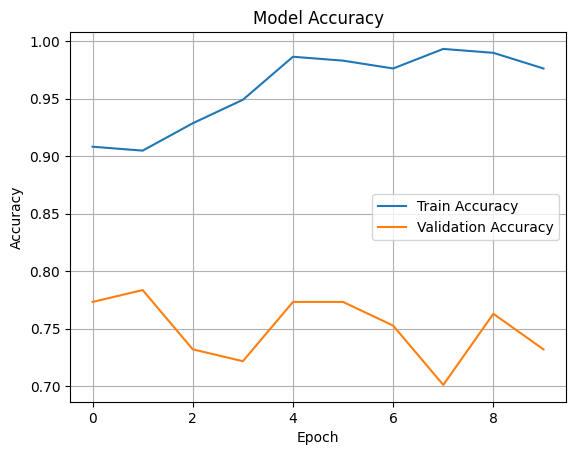

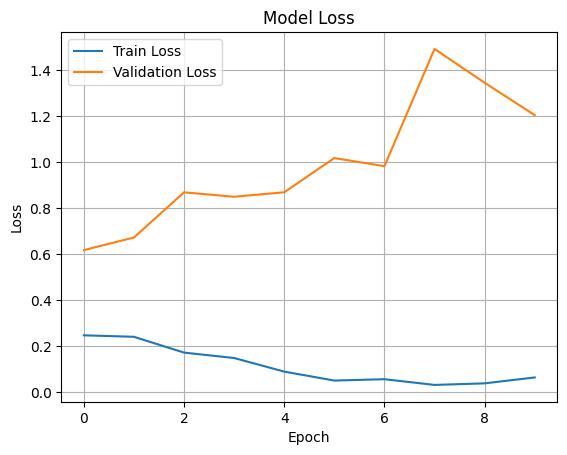

In [4]:
import matplotlib.pyplot as plt

# Save history
history = model.fit(train_data, epochs=10, validation_data=test_data)

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

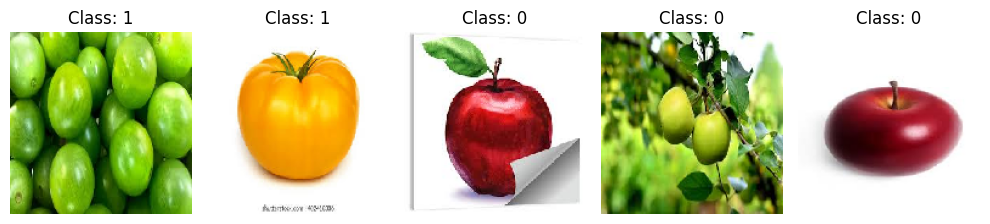

In [5]:
import numpy as np

# Get a batch of images and labels
images, labels = next(train_data)

# Plot first 5 images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 140ms/step


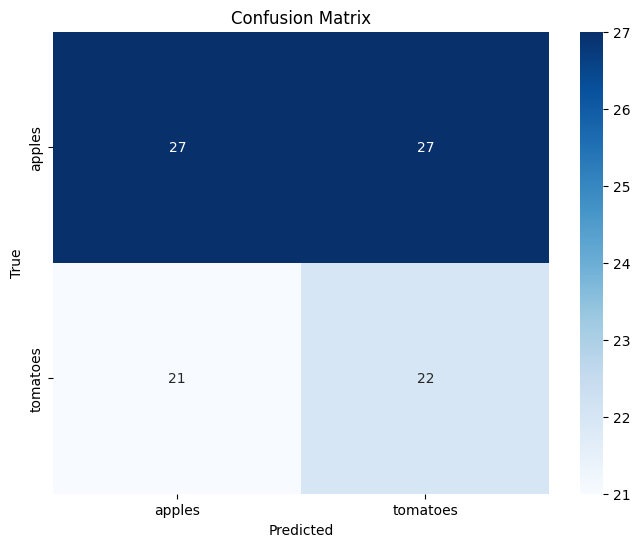

              precision    recall  f1-score   support

      apples       0.56      0.50      0.53        54
    tomatoes       0.45      0.51      0.48        43

    accuracy                           0.51        97
   macro avg       0.51      0.51      0.50        97
weighted avg       0.51      0.51      0.51        97



In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get true labels and predictions
test_data.reset()
Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_data.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=list(test_data.class_indices.keys()),
            yticklabels=list(test_data.class_indices.keys()))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_true, y_pred, target_names=list(test_data.class_indices.keys())))
